Sources :
- Git : https://github.com/matplotlib/basemap
- Oreilly : https://www.oreilly.com/library/view/python-data-science/9781491912126/ch04.html

    python -m pip install basemap

<div class = "alert alert-block alert-danger"> Dependancies can be an issue, work in a dedicated environement if necessary : 

    conda create -n testBasemap
    
</div>

<div class = "alert alert-block alert-warning">
Only the 'crude', 'low' and
'intermediate' resolution datasets are installed by default. If you
are requesting a 'high' or 'full' resolution dataset, you need to
install the `basemap-data-hires` package.


    python -m pip install basemap-data-hires

</div>

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


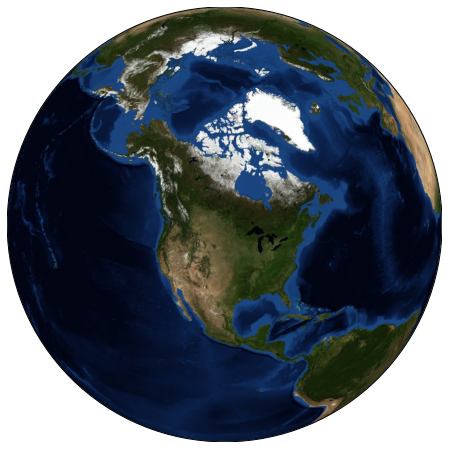

In [4]:
plt.figure(figsize=(8, 8))

m = Basemap(projection='ortho', 
            resolution=None, 
            lat_0=50, 
            lon_0=-100)

m.bluemarble(scale=0.5);

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


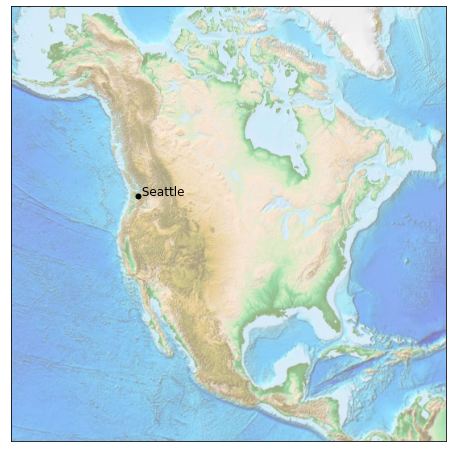

In [6]:
fig = plt.figure(figsize=(8, 8))

m = Basemap(projection='lcc', resolution=None,
           width=8E6, height=8E6,
           lat_0=45, lon_0=-100,)

m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-122.3, 47.6)

plt.plot(x, y, 'ok', markersize=5)

plt.text(x, y, ' Seattle', fontsize=12)

In [11]:
from itertools import chain

def draw_map(m, scale=0.2):
   # draw a shaded-relief image
    m.shadedrelief(scale=scale)

    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)

    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

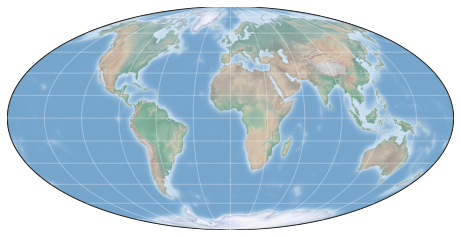

In [13]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')

m = Basemap(projection='moll', resolution=None,
           lat_0=0, lon_0=0)

draw_map(m)

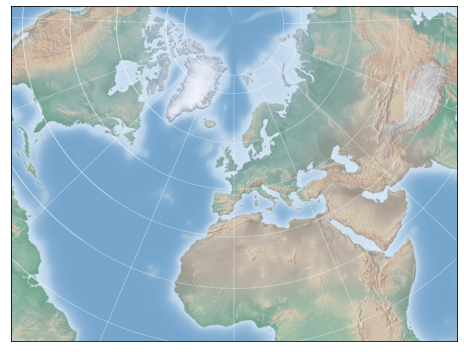

In [12]:
fig = plt.figure(figsize=(8, 8))

m = Basemap(projection='lcc', resolution=None,
           lon_0=0, lat_0=50, lat_1=45, lat_2=55,
           width=1.6E7, height=1.2E7)

draw_map(m)

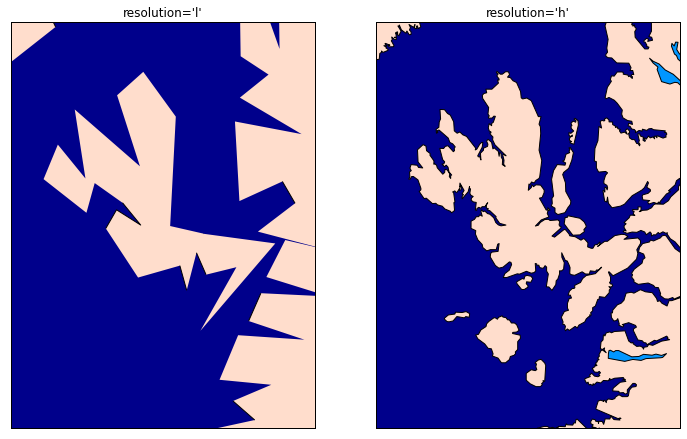

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(12, 8))

for i, res in enumerate(['l', 'h']):
    m = Basemap(projection='gnom', lat_0=57.3, lon_0=-6.2,
               width=90000, height=120000, resolution=res, ax=ax[i])
    
    m.fillcontinents(color="#FFDDCC", 
                     lake_color='#0096FF')
    
    m.drawmapboundary(fill_color="#00008B")
    
    m.drawcoastlines()
    
    ax[i].set_title("resolution='{0}'".format(res));
            